In [1]:
import os

import warnings

import numpy as np
import netCDF4
import datetime
import pyart
import My_pyart_functions

from pyart.core.grid import Grid
from pyart.io.cfradial import _ncvar_to_dict, _create_ncvar
from pyart.io.common import _test_arguments

%matplotlib inline

In [2]:
datapath=os.getcwd()

In [3]:
datefile=datapath+'/RAINS_uncal_BNG_5km20160607_222951.nc'

In [4]:
reserved_variables = [
        'time', 'x', 'y', 'z',
        'origin_latitude', 'origin_longitude', 'origin_altitude',
        'point_x', 'point_y', 'point_z', 'projection',
        'point_latitude', 'point_longitude', 'point_altitude',
        'radar_latitude', 'radar_longitude', 'radar_altitude',
        'radar_name', 'radar_time', 'base_time', 'time_offset',
        'ProjectionCoordinateSystem']


In [5]:
dset = netCDF4.Dataset(datefile, mode='r')

In [6]:
metadata = dict([(k, getattr(dset, k)) for k in dset.ncattrs()])

In [7]:
print metadata

{u'comment': u'', u'title': u'ncas-mobile-xband-radar', u'Conventions': u'CF-1.0', u'source': u'Selex Gematronik 50DX Mobile X-band Radar', u'institution': u'NCAS', u'history': u'No QCApplying azimuth offset: 0, time 2016/07/28 12:51:43\nApplying elevation offset: 0, time 2016/07/28 12:51:43\n'}


In [8]:
time = _ncvar_to_dict(dset.variables['time'])

In [9]:
origin_latitude = _ncvar_to_dict(dset.variables['lat0']) # Get dict information from lat array in radx file
origin_latitude['data']=[dset.variables['grid_mapping_0'].latitude_of_projection_origin] # set data singel value from Grid info origin from radx file

origin_longitude = _ncvar_to_dict(dset.variables['lon0']) # Get dict information from lon array in radx file
origin_longitude['data']=[dset.variables['grid_mapping_0'].longitude_of_central_meridian] # set data singel value from Grid info origin from radx file

origin_altitude = _ncvar_to_dict(dset.variables['z0']) # only need first alt and it needs to be in meters
origin_altitude['data']=[origin_altitude['data'][0]*1000] # only need first alt and it needs to be in meters
origin_altitude['units']='m'

In [10]:
print origin_altitude
print origin_longitude
print origin_latitude

{u'positive': u'up', u'long_name': u'constant altitude levels', u'standard_name': u'altitude', u'units': 'm', 'data': [100.00000149011612], u'axis': u'Z'}
{u'units': u'degrees_east', u'standard_name': u'longitude', 'data': [-2.0]}
{u'units': u'degrees_north', u'standard_name': u'latitude', 'data': [49.0]}


In [11]:
x = _ncvar_to_dict(dset.variables['x0'])
print x['data']*1000
print x['data'].tolist()

[ 150000.  155000.  160000.  165000.  170000.  175000.  180000.  185000.
  190000.  195000.  200000.  205000.  210000.  215000.  220000.  225000.
  230000.  235000.  240000.  245000.  250000.  255000.  260000.  265000.
  270000.  275000.  280000.  285000.  290000.  295000.  300000.  305000.
  310000.  315000.  320000.  325000.  330000.  335000.  340000.  345000.
  350000.  355000.  360000.  365000.  370000.  375000.  380000.  385000.
  390000.  395000.  400000.  405000.  410000.  415000.  420000.  425000.
  430000.  435000.  440000.  445000.  450000.  455000.]
[150.0, 155.0, 160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0, 195.0, 200.0, 205.0, 210.0, 215.0, 220.0, 225.0, 230.0, 235.0, 240.0, 245.0, 250.0, 255.0, 260.0, 265.0, 270.0, 275.0, 280.0, 285.0, 290.0, 295.0, 300.0, 305.0, 310.0, 315.0, 320.0, 325.0, 330.0, 335.0, 340.0, 345.0, 350.0, 355.0, 360.0, 365.0, 370.0, 375.0, 380.0, 385.0, 390.0, 395.0, 400.0, 405.0, 410.0, 415.0, 420.0, 425.0, 430.0, 435.0, 440.0, 445.0, 450.0, 455.0

In [12]:
# Get catersian grid spacing information from radx file and set vlaues and units to meters
x = _ncvar_to_dict(dset.variables['x0'])
x['data']=x['data']*1000
#x['data']=x['data'].tolist()
x['units']='m'
y = _ncvar_to_dict(dset.variables['y0'])
y['data']=y['data']*1000
#y['data']=y['data'].tolist()
y['units']='m'
z = _ncvar_to_dict(dset.variables['z0'])
z['data']=z['data']*1000
#z['data']=z['data'].tolist()
z['units']='m'


In [13]:
print x
print y
print z

{u'units': 'm', u'standard_name': u'projection_x_coordinate', 'data': array([ 150000.,  155000.,  160000.,  165000.,  170000.,  175000.,
        180000.,  185000.,  190000.,  195000.,  200000.,  205000.,
        210000.,  215000.,  220000.,  225000.,  230000.,  235000.,
        240000.,  245000.,  250000.,  255000.,  260000.,  265000.,
        270000.,  275000.,  280000.,  285000.,  290000.,  295000.,
        300000.,  305000.,  310000.,  315000.,  320000.,  325000.,
        330000.,  335000.,  340000.,  345000.,  350000.,  355000.,
        360000.,  365000.,  370000.,  375000.,  380000.,  385000.,
        390000.,  395000.,  400000.,  405000.,  410000.,  415000.,
        420000.,  425000.,  430000.,  435000.,  440000.,  445000.,
        450000.,  455000.], dtype=float32), u'axis': u'X'}
{u'units': 'm', u'standard_name': u'projection_y_coordinate', 'data': array([  700000.,   705000.,   710000.,   715000.,   720000.,   725000.,
         730000.,   735000.,   740000.,   745000.,   75000

In [14]:
projection = _ncvar_to_dict(dset.variables['grid_mapping_0'])
projection.pop('data')
print dset.variables['grid_mapping_0']

<type 'netCDF4._netCDF4.Variable'>
int32 grid_mapping_0()
    grid_mapping_name: transverse_mercator
    longitude_of_central_meridian: -2.0
    latitude_of_projection_origin: 49.0
    scale_factor_at_central_meridian: 0.999601
    false_easting: 400.0
    false_northing: -100.0
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used



In [15]:
# Create necessary projetion params for basemap and pyart from values in grid_mapping_0 variable in radx created file
# proj string will need to have different if statments added for different projections used when gridding in radx
# false easting and northing need to be in meters
if dset.variables['grid_mapping_0'].grid_mapping_name == "transverse_mercator":
    projstr = 'tmerc'
else:
    projstr = None

projection={
    'k_0' : dset.variables['grid_mapping_0'].scale_factor_at_central_meridian,
    'lat_0' : dset.variables['grid_mapping_0'].latitude_of_projection_origin,
    'lon_0' : dset.variables['grid_mapping_0'].longitude_of_central_meridian,
    'proj' : 'tmerc',
    'vunits' : 'm',
    'x_0': dset.variables['grid_mapping_0'].false_easting*1000,
    'y_0' : dset.variables['grid_mapping_0'].false_northing*1000
}
print projection


{'lon_0': -2.0, 'k_0': 0.99960124, 'y_0': -100000.0, 'vunits': 'm', 'proj': 'tmerc', 'x_0': 400000.0, 'lat_0': 49.0}


In [16]:
# Check proj params work
from mpl_toolkits.basemap import pyproj
proj = pyproj.Proj(projection)
print proj.srs
print proj.is_latlong()


+units=m +lon_0=-2.0 +k_0=0.999601 +y_0=-100000.0 +vunits=m +proj=tmerc +x_0=400000.0 +lat_0=49.0 
False


In [17]:
# Read in Fields
exclude_fields=None
if exclude_fields is None:
    exclude_fields = []

fields = {}
field_shape = tuple([len(dset.dimensions[d]) for d in ['z0', 'y0', 'x0']])
field_shape_with_time = (1, ) + field_shape


field_keys = [k for k in dset.variables if k not in reserved_variables]
for field in field_keys:
    if field in exclude_fields:
        continue
    field_dic = _ncvar_to_dict(dset.variables[field])
    if field_dic['data'].shape == field_shape_with_time:
        field_dic['data'].shape = field_shape
        fields[field] = field_dic
    else:
        bad_shape = field_dic['data'].shape
        warnings.warn('Field %s skipped due to incorrect shape' % (field))

/Users/rrniii/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Field start_time skipped due to incorrect shape
/Users/rrniii/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Field stop_time skipped due to incorrect shape
/Users/rrniii/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Field time_bounds skipped due to incorrect shape
/Users/rrniii/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Field x0 skipped due to incorrect shape
/Users/rrniii/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Field y0 skipped due to incorrect shape
/Users/rrniii/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Field lat0 skipped due to incorrect shape
/Users/rrniii/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: UserWarning: Field lon0 skipped due to incorrect shape
/Users/rrniii/anaconda/lib/python2.7/site-packages/ipykernel/_

In [18]:
### radar_ variables
if 'radar_latitude' in dset.variables:
    radar_latitude = _ncvar_to_dict(dset.variables['radar_latitude'])
else:
    radar_latitude = None
    
if 'radar_longitude' in dset.variables:
    radar_longitude = _ncvar_to_dict(dset.variables['radar_longitude'])
else:
    radar_longitude = None

if 'radar_altitude' in dset.variables:
    radar_altitude = _ncvar_to_dict(dset.variables['radar_altitude'])
else:
    radar_altitude = None
        
if 'radar_name' in dset.variables:
    radar_name = _ncvar_to_dict(dset.variables['radar_name'])
else:
    radar_name = None

if 'radar_time' in dset.variables:
    radar_time = _ncvar_to_dict(dset.variables['radar_time'])
else:
    radar_time = None

In [19]:
grid=Grid(time, fields, metadata,origin_latitude, origin_longitude, origin_altitude, x, y, z,
     projection=projection,radar_latitude=radar_latitude, radar_longitude=radar_longitude,
     radar_altitude=radar_altitude, radar_name=radar_name,radar_time=radar_time)

All below is just for plotting up the now read in data from the radx cartesian file

In [20]:
display = pyart.graph.GridMapDisplay(grid)
#from mpl_toolkits.basemap import Basemap

corners = [dset.variables['lon0'][:].min(), dset.variables['lon0'][:].max(), 
           dset.variables['lat0'][:].min(), dset.variables['lat0'][:].max()]
print corners

corners = [-6.02287587,-1.04216328, 
           56.12653921, 59.01803756]
print corners
lon0 = corners[0] + np.abs(corners[1]-corners[0])/2
lat0 = corners[2] + np.abs(corners[3]-corners[2])/2
#bm = Basemap(projection='tmerc', resolution='l', 
#             llcrnrlon=corners[0], urcrnrlon=corners[1], 
#             llcrnrlat=corners[2], urcrnrlat=corners[3],
#             lon_0=lon0, lat_0=lat0)
#display.basemap = bm

[-6.3574319, -1.0398366, 56.123714, 59.02021]
[-6.02287587, -1.04216328, 56.12653921, 59.01803756]


In [21]:
import matplotlib.pyplot as plt
#fig = plt.figure(figsize=[15, 8])
#fig, ax = plt.subplots(1, 1, figsize=(15, 8))


56.1265392121


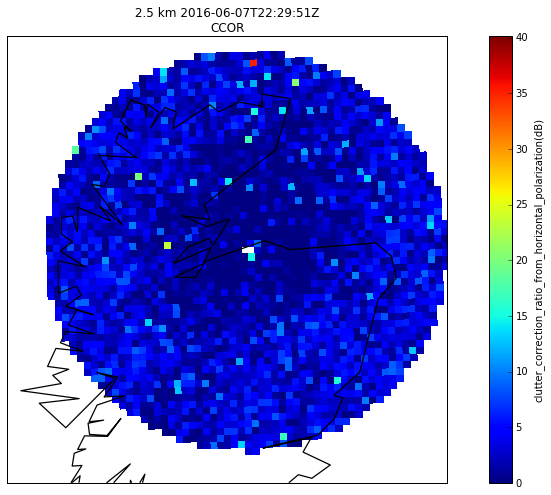

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
# SOmthing is still a bit strnage when you try to plot the data. You must first make a base map 
# and at least give it lat_0 and lon_0 as the middle of the plot and or radar location
lon, lat =grid.get_point_longitude_latitude()

bm = display.plot_basemap(resolution='l',
                          auto_range=False, min_lon=lon.min(), max_lon=lon.max(), 
                          min_lat=lat.min(), max_lat=lat.max(), 
                          projection='tmerc', lat_0=lat.mean(), lon_0=lon.mean(), ax=ax)
p = display.plot_grid('CCOR', level=10, ax=ax)#, vmin=-32, vmax=64)

In [23]:
# Looking at the data below was the key to trouble shooting the projection parmas issues
# Shoudl be a resaonlable range of lons and lats for the data.
grid.get_point_longitude_latitude()

(array([[-6.02287587, -5.94263506, -5.86238116, ..., -1.2749074 ,
         -1.19435009, -1.11379547],
        [-6.02756755, -5.94723376, -5.86688683, ..., -1.27405906,
         -1.19340752, -1.11275868],
        [-6.03227263, -5.9518456 , -5.87140537, ..., -1.27320829,
         -1.19246225, -1.11171893],
        ..., 
        [-6.33565334, -6.24921844, -6.16276674, ..., -1.21833043,
         -1.13148921, -1.04465146],
        [-6.34127022, -6.25472417, -6.16816125, ..., -1.21731401,
         -1.13035991, -1.04340928],
        [-6.3469043 , -6.26024677, -6.1735723 , ..., -1.21629447,
         -1.12922713, -1.04216328]]),
 array([[ 56.12653921,  56.12912989,  56.13166853, ...,  56.189928  ,
          56.1894294 ,  56.18887834],
        [ 56.17135191,  56.17394695,  56.17648986, ...,  56.23484752,
          56.23434808,  56.23379608],
        [ 56.21616403,  56.21876344,  56.22131063, ...,  56.2797667 ,
          56.27926642,  56.27871349],
        ..., 
        [ 58.85900994,  58.8618866

In [24]:
# Test imported module on another file
from grid_io_withradx2gridread import read_radx_grid


In [42]:
gridtest=read_radx_grid(datefile, exclude_fields=None)

displaytest = pyart.graph.GridMapDisplay(gridtest)



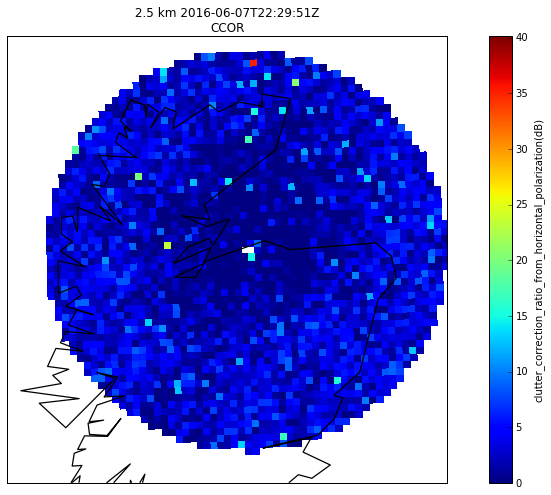

In [48]:
fig1test, axtest = plt.subplots(1, 1, figsize=(15, 8))
# SOmthing is still a bit strnage when you try to plot the data. You must first make a base map 
# and at least give it lat_0 and lon_0 as the middle of the plot and or radar location
lontest, lattest =gridtest.get_point_longitude_latitude()

bmtest = displaytest.plot_basemap(resolution='l',
                          auto_range=False, min_lon=lontest.min(), max_lon=lontest.max(), 
                          min_lat=lattest.min(), max_lat=lattest.max(), 
                          projection='tmerc', lat_0=lattest.mean(), lon_0=lontest.mean(), ax=axtest)

ptest = displaytest.plot_grid('CCOR', level=10, ax=axtest)#, vmin=-32, vmax=64)
